In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
def get_single_roll_probability_matrix(max_score):
    # p is a matrix with the property that p[i, j] is the probability of having a score of j, one roll after having a score of i.
    # since 1 is an impossible score, we use this for the starting roll, and 0 as the final roll (after rolling a 1)
    p = np.zeros((max_score, max_score))
    p[0, 0] = 1 # this means that once you've rolled a 1, your score will be stuck at 0, i.e. with probability 1 your score will be 0
    p[1:, 0] = 1/6 # for any score other than 0, there is a 1/6 chance to get to 0 after one roll
    # Now for all the other transitions:
    p[1, 2:7] = 1/6
    for score in range(2, max_score-5):
        p[score, score+2:score+7] = 1/6 # the probability of rolling anything between 2 and 6 is 1/6
    p[max_score-5:, max_score-5:] = np.eye(5)
    p[max_score-5:, 0] = 0
    return p

def get_score_probabilities_for_target_score(target_score):
    p = get_single_roll_probability_matrix(target_score*3)
    # set any score from target_score and above to be a sink
    p[target_score:, 0] = 0
    p[target_score:, target_score:] = np.eye(2*target_score)
    # it can take at most target_score/2 turns to get to target_score, any more or less than that is guaranteed to end at a different score
    p = np.linalg.matrix_power(p, target_score)
    return p[1]
    
def get_expected_score_for_target_score(target_score):
    score_probabilities = get_score_probabilities_for_target_score(target_score)
    expected_score = 0
    for score, probability in enumerate(score_probabilities):
        expected_score += score*probability
    return expected_score
    

<BarContainer object of 38 artists>

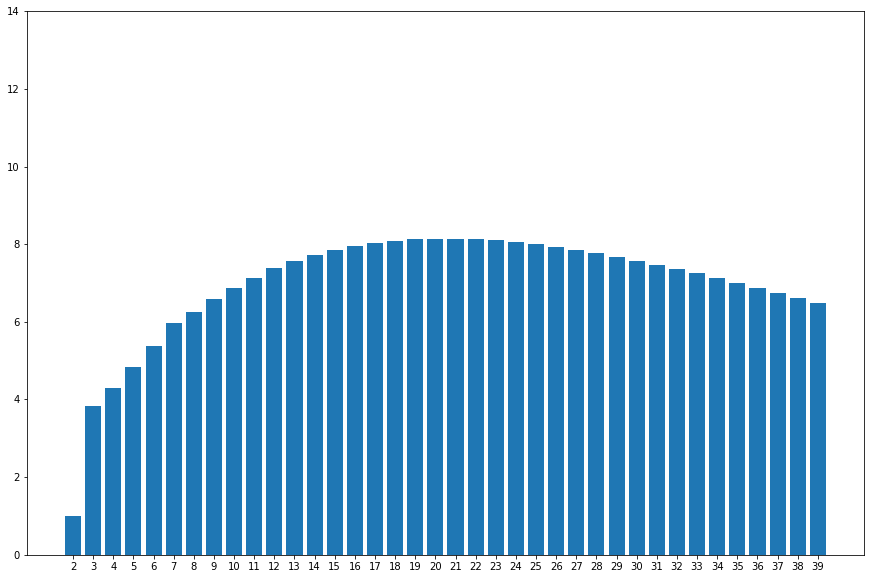

In [111]:
x = np.arange(2,40)
y = [get_expected_score_for_target_score(i) for i in x]
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylim((0,14))
ax.set_xticks(x)
ax.bar(x,y)

In [115]:
best_strategy = np.argmax(y) + 2
expected_score = get_expected_score_for_target_score(best_strategy)
print(f"The best strategy is to stop after reaching the score of {best_strategy}, this wil yield {expected_score} points on average.")

The best strategy is to stop after reaching the score of 20, this wil yield 8.14179489372703 points on average.
